# CPEG 586 – Assignment 1


## Problem 1: 

Try the examples in the Python Handout (under the handouts link on the CPEG 586 website).

In [ ]:
# Copmpleted Offline

## Problem 2:
In the lecture, we studied the Linear Least Squares Optimization for estimating the model
parameters of a line to fit the given data. Do a second order polynomial fit to the following data using
Linear Least Squares Optimization. Program the code using Python.

\begin{equation*}
𝑓(\vec{x}; \vec{𝛽} ) = 𝛽_0 + 𝛽_1𝑥 + 𝛽_2𝑥^2 + ⋯
\end{equation*}

|x|y|
|---|---|
|1|3.2|
|2|6.4|
|3|10.5|
|4|17.7|
|5|28.1|
|6|38.5|


![LeastLinearSquareImage.png](LeastLinearSquareImage.png)



In [290]:
import numpy as np
import matplotlib.pyplot as plt

from http://mathworld.wolfram.com/LeastSquaresFittingPolynomial.html the following solution was obtained 

![function](NumberedEquation3.png)

In [4]:
def PolyFit(x,y,order):  #order will denote the tipe of curve: 1 = linear; > 1 Curve with n-1 inflections
    dimension = order+1
    A = np.zeros((dimension,dimension))
    for row in range(dimension):
        for col in range(dimension):
            A[row,col] = np.sum(x**(row+col))
    
    Z = np.zeros(dimension)
    for row in range(dimension):
        Z[row] = np.sum(y*x**row)
        ainv = np.linalg.inv(A)
    
    res = np.dot(ainv,Z)
    res = res.reshape((res.shape[0],1))
    
    yfitted = np.zeros((x.shape[0],1))
    for p in range(res.shape[0]):
        yfitted = yfitted + x**(p) * res[p,0]
        
    return yfitted

In [6]:
def plot(x,y,yfitted):
    area = 10
    colors =['black']
    plt.scatter(x, y, s=area, c=colors, alpha=0.5, linewidths=8)
    plt.title('Linear Least Squares Regression')
    plt.xlabel('x')
    plt.ylabel('y')
    #plot the fitted line

    line,=plt.plot(x, yfitted, '--', linewidth=2) #line plot
    line.set_color('red')
    plt.show()

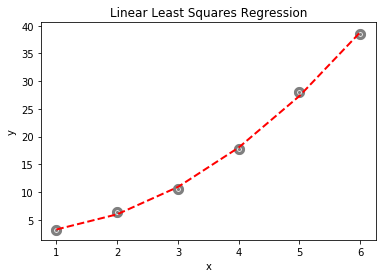

In [7]:
x = np.array([[1],[2],[3],[4],[5],[6]])
y = np.array([[3.2],[6.4],[10.5],[17.7],[28.1],[38.5]])
yfitted = PolyFit(x,y,order=2)
plot(x,y,yfitted)

# Problem 3

![SingleNeuron.png](SingleNeuron.png)

a) For the single neuron network described in lecture 1, show derivations for computing the
   gradients w1, w2 and b.

   Assume the network will be classifying using the decision boundary given by
   y = 0.3 x + 2 

In [ ]:
# gradw = -(y-a)*x
gradw1 = -1*(y-a)*x1
gradw2 = -1*(y-a)*x2
#gradb = -(y-a)
gradb = -1 * (y-a)*1

In the lecture, x in above equation is referred to as x1, and y is referred to as x2. Y is the class that a
given point at (x1,x2) belongs to. If the point is below the line, the class is 0, if the point is above the
line, the class is 1.
For example the training data may appear as:

|X1| X2 |Y (class)|
|---|---|---|
|1 |2.2 |0|
|1 |2.4 |1|
|2 |2.5 |0|
|2 |2.7 |1|
|… |… |…|



b) Program the back propagation algorithm according to the equations developed in part a).
Once the network is trained, the test data to use in your program could be:

|X1 |X2 |Expected output|
|---|---|---|
|1.5 |2.4 |0|
|1.5 |2.5 |1|
|2.5 |2.7 |0|
|2.5 |2.8 |1|
|… |… |…|

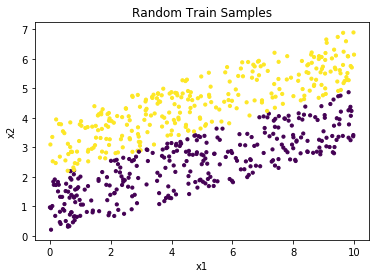

In [338]:
#initialize variables
def initialize_var():
    np.random.seed(1)
    w = np.random.rand(1,2)*.1
    b = np.zeros(1)
    return w,b

def create_data(samples):

    x = np.zeros((2,samples))
    y = np.zeros(samples)
    np.random.seed(19661105)
    for i in range(samples):
        x1 = np.random.rand()*10
        sign = np.random.choice([-1,1])
        x2 = x1*0.3 + 2 + sign*np.random.rand()*2
        x[:,i] = [x1,x2]
        if sign == -1:
            y[i] = 0
        else:
            y[i] = 1
    return x,y

x_train,y_train = create_data(600)
x_test,y_test = create_data(50)        
        
colors =y_train
plt.scatter(x_train[0,:], x_train[1,:], s=10, c=colors)
plt.title('Random Train Samples')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()
    

In [350]:
def forward(x,w,b):
    est = np.matmul(w,x) + b
    y = [0 if i < 0.5 else 1 for i in est[0]]
    return y

def loss(y,y_predict):
    l = np.sum(np.square(y-y_predict))
    return l

def backprop(x,y_act,y_predict):
    gradw = np.sum(-(y_act-y_predict)*x,axis=1)
    gradb = np.sum(-(y_act-y_predict))
    return gradw,gradb


In [351]:
def train(lr = 0.01):
    w,b = initialize_var()

    for epoch in range(10):
        for sample in range(x_train.shape[1]):
            x = x_train[:,sample].reshape(x_train.shape[0],1)
            y = y_train[sample]
            y_predict = forward(x,w,b)
            l = loss(y,y_predict)
            gradw,gradb = backprop(x,y,y_predict)
            w = w - lr*gradw
            b = b - lr*gradb
        if epoch % 100 == 0:
            print(l)
    return w,b,l
w,b,l = train()

0.0


In [352]:
resc = forward(x_test,w,b)

In [353]:
print(resc-y_test)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
